Initialization

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os

#Creating directories
raw_data_dir = r"E:\AIML_Project\data\raw"
processed_dir = r"E:\AIML_Project\results\outputs"
eda_ev_dir = r"E:\AIML_Project\results\eda_visualizations"

In [2]:
#Loading the dataset

df = pd.read_csv("E:/AIML_Project/data/raw/adult.data", header=None)

display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Scaling - Assigned to IT24102080

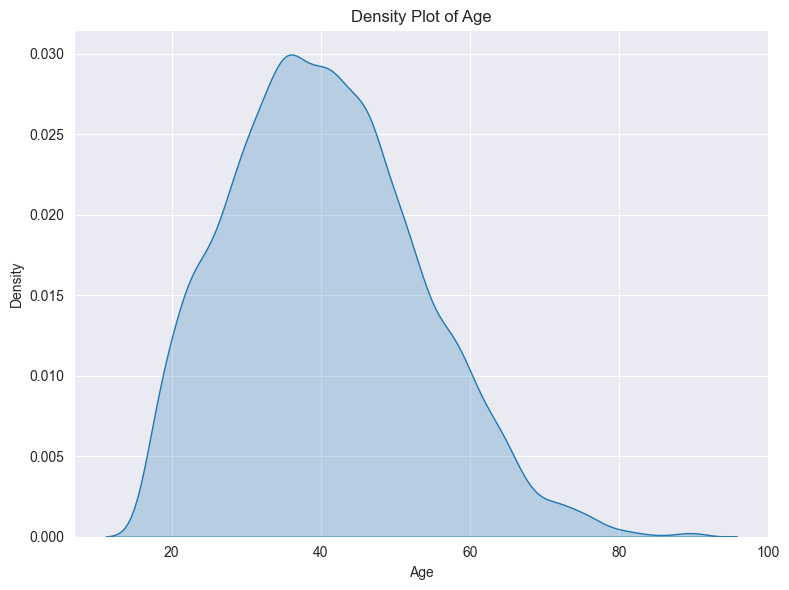

Age density plot saved to processed directory.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'))

# Create density plot for age
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_train, x='age', fill=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(eda_ev_dir, 'age_density.png'))
plt.show()
print("Age density plot saved to processed directory.")

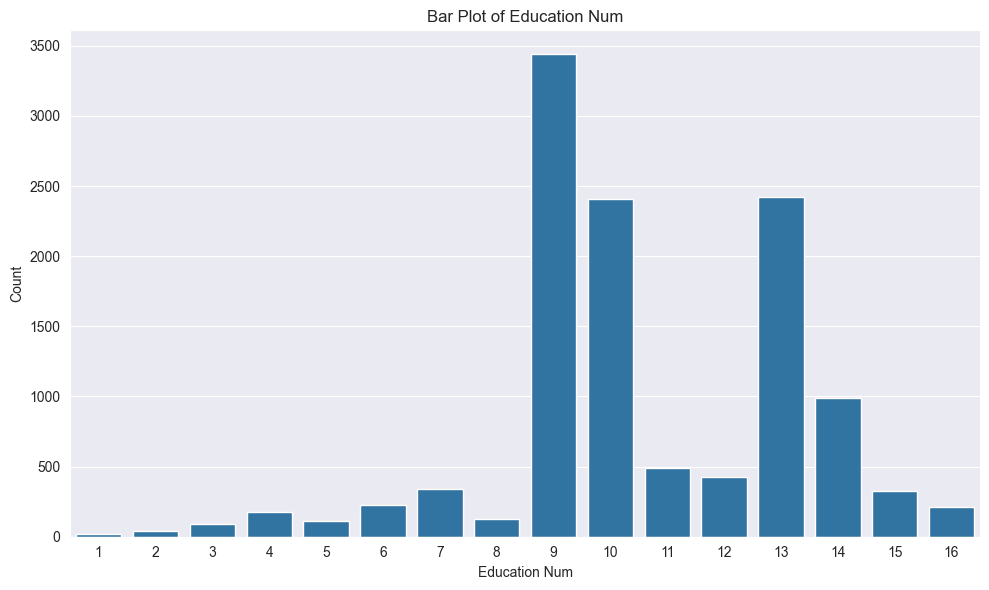

Education num bar plot saved to processed directory.


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'))

# Create bar plot for education_num
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='education_num')
plt.title('Bar Plot of Education Num')
plt.xlabel('Education Num')
plt.ylabel('Count')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(eda_ev_dir, 'education_num_bar.png'))
plt.show()
print("Education num bar plot saved to processed directory.")

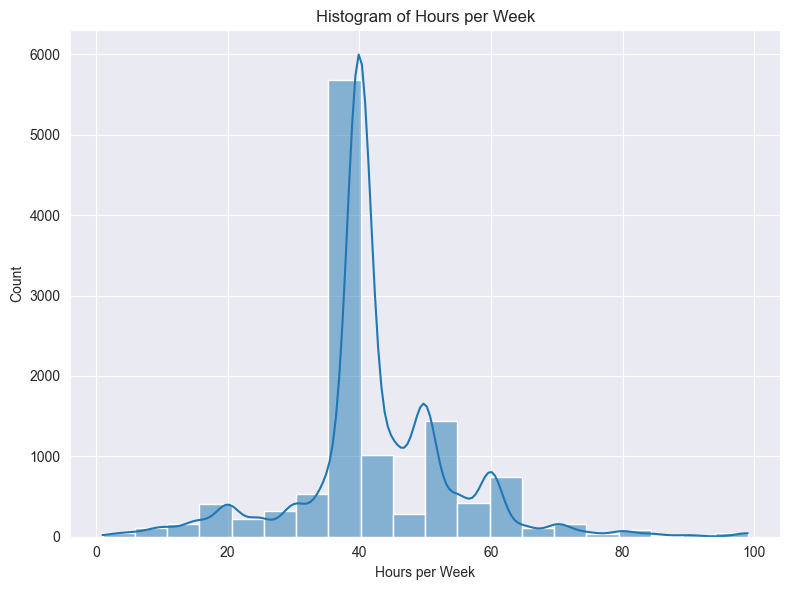

Hours per week histogram saved to processed directory.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'))

# Create histogram for hours_per_week
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='hours_per_week', bins=20, kde=True)
plt.title('Histogram of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(eda_ev_dir, 'hours_per_week_hist.png'))
plt.show()
print("Hours per week histogram saved to processed directory.")

In [20]:
#From the generated charts
#Age - Standard Scaler(Z-score scaler) = shows a near-normal curve, supporting StandardScaler
#education_num - MinMaxScaler = bounded skew justifies MinMaxScaler
#hours_per_week - RobustScaler = right skew and outliers validate RobustScaler

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load the datasets
train_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'))
test_df = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_test.csv'))

# Initialize scalers
scaler_age = StandardScaler()
scaler_edu = MinMaxScaler()
scaler_hours = RobustScaler()

# Define columns to scale
columns_to_scale = {'age': scaler_age, 'education_num': scaler_edu, 'hours_per_week': scaler_hours}

# Fit scalers on training data and transform both train and test
for column, scaler in columns_to_scale.items():
    # Fit on train data only
    scaler.fit(train_df[[column]])
    # Transform both train and test
    train_df[column] = scaler.transform(train_df[[column]])
    test_df[column] = scaler.transform(test_df[[column]])

# Verify shapes and dtypes
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nTraining set dtypes:\n", train_df.dtypes)

# Display sample scaled values for verification
print("\nSample scaled values (first 5 rows):")
print(train_df[['age', 'education_num', 'hours_per_week']].head())

# Save (corrected test file name)
train_df.to_csv(os.path.join(processed_dir, 'IT_24102080_scaled_train.csv'), index=False)
test_df.to_csv(os.path.join(processed_dir, 'IT_24102080_scaled_test.csv'), index=False)
print("Saved scaled datasets to processed directory.")

Training set shape: (11840, 78)
Test set shape: (2960, 78)

Training set dtypes:
 age                               float64
education_num                     float64
hours_per_week                    float64
income                              int64
workclass_Local-gov                 int64
                                   ...   
native_country_Thailand             int64
native_country_Trinadad&Tobago      int64
native_country_United-States        int64
native_country_Vietnam              int64
native_country_Yugoslavia           int64
Length: 78, dtype: object

Sample scaled values (first 5 rows):
        age  education_num  hours_per_week
0 -0.284563       0.800000             0.0
1 -1.390343       0.600000            -2.5
2  0.268326       0.733333             0.0
3  1.058169       0.866667             0.0
4 -1.390343       0.600000            -2.0
Saved scaled datasets to processed directory.
